<h2>Sign Language Classifcation - B21-CAP0444 (Slinguage) </h2>
<h3>Notebook model transfer learning di bawah ini di deploy kedalam google cloud</h3>



### Importing packages <a id=1></a>



In [ ]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


### Importing Dataset Kaggle <a id=1></a>
#### Note anda membutuh kan json api dari akun kaggle anda


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"naelchris","key":"de76ef238b887a027594655c70954a61"}'}

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 asl-alphabet.zip   kaggle.json  '~p'   sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('asl-alphabet.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
# !unzip \*.zip  && rm *.zip
%cd files
!ls 

/content/files
asl_alphabet_test  asl_alphabet_train


### Importing the dataset from training directory <a id=2></a>

In [ ]:
!ls

asl_alphabet_test  asl_alphabet_train


In [ ]:
batch_size = 64
imageSize = 75
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
# train_dir = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
train_dir = 'asl_alphabet_train/asl_alphabet_train/'


def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


#### Checking the shape of data <a id=3></a>

In [ ]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 75, 75, 3)
The shape of y_train is :  (87000,)


#### Checking the shape of one image <a id=4></a>

In [ ]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (75, 75, 3)


#### Viewing the image <a id=5></a>

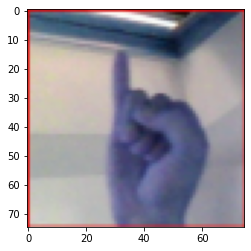

In [ ]:
plt.imshow(X_train[10])
plt.show()

##### Making copies of original data

In [ ]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


### Data processing <a id=6></a>

#### Train/test split <a id=7></a>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

#### One-Hot-Encoding <a id=8></a>

In [ ]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

#### Dimension Check of variables <a id=9></a>

In [ ]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 75, 75, 3)
(60900,)
(26100, 75, 75, 3)
(26100,)
(60900, 29)
(26100, 29)


### Garbage Collection <a id=10></a>

In [ ]:
# This is done to save CPU and RAM space while working on Kaggle Kernels. This will delete the specified data and save some space!
import gc
del X_data
del y_data
gc.collect()

2603

### Modeling <a id=11></a>

#### Importing packages <a id=12></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


In [ ]:
!ls

asl_alphabet_test  asl_alphabet_train


In [ ]:
#downloding inception v3
% cd ../

!mkdir /pretrained_model

/content


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
  -O /pretrained_model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

path_inception = f"/pretrained_model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"


--2021-05-31 15:51:25--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/pretrained_model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/pretrained_model/i 100%[===================>]  83.84M  92.3MB/s    in 0.9s    

2021-05-31 15:51:26 (92.3 MB/s) - ‘/pretrained_model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



#### Building model <a id=13></a>

In [ ]:
# model = Sequential()

# model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(128, activation='relu'))

# model.add(Dense(29, activation='softmax'))

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception

pre_trained_model = InceptionV3(
    input_shape=(75, 75, 3),
    include_top=False,
    weights=None
)
pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

#model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 768)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.3)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(29, activation='softmax')(x) 

model = Model(pre_trained_model.input, x) 

#### Early Stopping and Compiling <a id=14></a>

##### Early Stopping

Early Stopping is done to make sure the model fitting stops at the most optimized accuracy point. After the early stopping point, the model might start overfitting. For testing purposes, this step can be skipped and complete training can be done.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

##### Compiling

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Model fitting <a id=15></a>

In [ ]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50
952/952 - 57s - loss: 0.3984 - accuracy: 0.8964 - val_loss: 0.0785 - val_accuracy: 0.9795
Epoch 2/50
952/952 - 26s - loss: 0.0479 - accuracy: 0.9876 - val_loss: 0.0257 - val_accuracy: 0.9930
Epoch 3/50
952/952 - 23s - loss: 0.0204 - accuracy: 0.9946 - val_loss: 0.0097 - val_accuracy: 0.9981
Epoch 4/50
952/952 - 23s - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0084 - val_accuracy: 0.9977
Epoch 5/50
952/952 - 27s - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0083 - val_accuracy: 0.9975
Epoch 6/50
952/952 - 24s - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 7/50
952/952 - 24s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 8/50
952/952 - 24s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 9/50
952/952 - 24s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 10/50
952/952 - 24s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0015 - val_accura

#### Model metrics <a id=16></a>

##### Metrics from model history

In [ ]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.398428,0.896404,0.078485,0.979540
1,0.047862,0.987586,0.025722,0.992950
2,0.020411,0.994581,0.009705,0.998123
3,0.010406,0.997291,0.008433,0.997739
4,0.007082,0.998145,0.008312,0.997548
5,0.004689,0.998752,0.003562,0.999042
6,0.003308,0.999195,0.003305,0.999004
7,0.002701,0.999261,0.002690,0.999272
8,0.001991,0.999376,0.002673,0.999310
9,0.001781,0.999376,0.001515,0.999579


##### Plotting the training loss

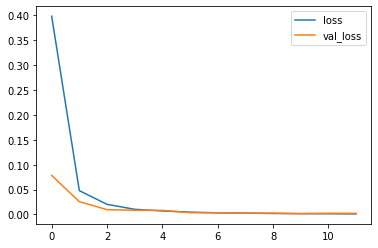

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

##### Plotting the testing loss

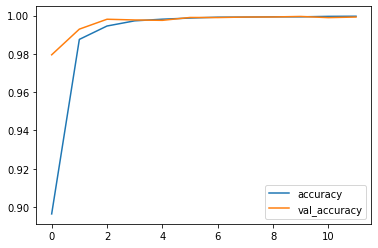

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

##### Model evaluation

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.0023111598566174507, 0.9992720484733582]

In [ ]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.models import load_model
alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
len(alphabet)

29

In [ ]:
X_test[0].shape

(75, 75, 3)

In [ ]:
# IMAGE_PATH = os.path.join('..','..','als2.jpg')
# img = cv2.imread(IMAGE_PATH)
# img_file = skimage.transform.resize(img, (64, 64, 3))
# img_arr = np.asarray(img_file).reshape((-1, 64, 64, 3))
# img_arr.shape

In [ ]:
proba = model.predict_classes(img_arr)
idx = np.argmax(proba)
idx

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0

In [ ]:
IMAGE_PATH = os.path.join('files','asl_alphabet_test','asl_alphabet_test','B_test')
img = cv2.imread(IMAGE_PATH)
img

In [ ]:
def classify(image):
  # image = skimage.transform.resize(image, (64, 64, 3))
  # img_arr = np.asarray(img_file).reshape((-1, 64, 64, 3))
  proba = model.predict(image)
  idx = np.argmax(proba)
  return alphabet[idx]

#masukan gambar disini
IMAGE_PATH = os.path.join('..','..','16690.jpg')
#IMAGE_PATH = os.path.join('78125.jpg')
img = cv2.imread(IMAGE_PATH)
img_file = skimage.transform.resize(img, (75, 75, 3))
img_arr = np.asarray(img_file).reshape((-1, 75, 75, 3))
classify(img_arr)

'Y'

##### Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      0.97      0.98       900
           2       1.00      1.00      1.00       900
           3       1.00      1.00      1.00       900
           4       0.99      0.99      0.99       900
           5       1.00      1.00      1.00       900
           6       1.00      0.97      0.99       900
           7       1.00      0.99      0.99       900
           8       0.99      1.00      0.99       900
           9       0.99      1.00      1.00       900
          10       0.99      0.96      0.98       900
          11       0.99      1.00      1.00       900
          12       1.00      0.99      0.99       900
          13       0.99      1.00      0.99       900
          14       1.00      0.99      1.00       900
          15       0.98      1.00      0.99       900
          16       1.00      1.00      1.00       900
          17       0.97    

#### Saving the model <a id=18></a>

In [ ]:
# from keras.models import load_model
model.save('ASL_transfer_learning.h5')
print("Model saved successfully...")

Model saved successfully...
